# ANÁLISE EXPLORATÓRIA DE DADOS - ESTIMATIVAS INCA 2020

#### Apresentação
O Brasil vive um momento importante na área da saúde pública devido ao SARS-COVID-19, mas não podemos deixar de lado a existência de outras complicações. O câncer é o principal problema de saúde pública do mundo e está entre as quatro principais causas de morte antes dos 70 anos de idade na maior parte dos países.

Esse caderno tem como objetivo explorar duas das tabelas da publicação anual do Instituto Nacional do Câncer José Alencar Gomes da Silva, que contém as estimativas para o câncer no ano de 2020. Serão analisadas a distribuição dos tipos de câncer mais incidentes no território brasileiro por sexo e os números estimados de casos de câncer por Unidade Federativa.






##  Distribuição dos Tipos de Câncer mais Incidentes por Sexo

### Criando os DataFrames

In [1]:
!pip install -q tabula-py

In [2]:
# LIBs necessárias:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import tabula

In [3]:
pdf_path = "https://github.com/nicolasbuen/Alura-s-Data-Science-Bootcamp/raw/master/modulo_2/desafio/data/tabelas_inca_2020.pdf"
dfs = tabula.read_pdf(pdf_path)

'pages' argument isn't specified.Will extract only from page 1 by default.


Esperamos 2 dataframes:
* A estimativa de novos casos de câncer do INCA;
* A distribuição dos tipos de câncer mais incidentes por sexo (com exceção do de pele não melanoma)

In [4]:
len(dfs)

2

In [5]:
# A estimativa de novos casos de câncer do INCA

dfs[0]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Estimativa dos Casos Novos,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,Homens,NaN,Mulheres,NaN,NaN
1,Localização Primária,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Neoplasia Maligna,NaN,Estados,NaN,Capitais Estados,NaN,Capitais,NaN
3,NaN,NaN,Taxa,Taxa,Taxa Taxa Taxa,Taxa,Taxa,Taxa
4,NaN,Casos,NaN,Casos,Casos,Casos,NaN,NaN
5,NaN,NaN,Bruta,Ajustada,Bruta Ajustada Bruta,Ajustada,Bruta,Ajustada
6,Próstata,65.840,"62,95","50,78 13.640","60,53 57,33 - -",- -,-,-
7,Mama feminina,-,-,- -,"- - 66.280 61,61","43,74 19.820","78,88","45,90"
8,Colo do útero,-,-,- -,"- - 16.590 15,43","12,60 4.180","16,55","10,13"
9,"Traqueia, brônquio e pulmão",17.760,"16,99","16,19 3.180","14,17 16,11 12.440 11,56","9,24 3.760","14,96","11,32"


In [6]:
# A distribuição dos tipos de câncer mais incidentes por sexo (com exceção do de pele não melanoma)

dfs[1]

,Localização Primária,Casos,%,Unnamed: 0,Unnamed: 1,Localização Primária.1,Casos.1,%.1
0,Próstata,65.84,"29,2%",Homens,Mulheres,Mama feminina,66.28,"29,7%"
1,Cólon e reto,20.52,"9,1%",NaN,NaN,Cólon e reto,20.47,"9,2%"
2,"Traqueia, brônquio e pulmão",17.76,"7,9%",NaN,NaN,Colo do útero,16.59,"7,4%"
3,Estômago,13.36,"5,9%",NaN,NaN,"Traqueia,brônquio e pulmão",12.44,"5,6%"
4,Cavidade oral,11.18,"5,0%",NaN,NaN,Glândula tireoide,11.95,"5,4%"
5,Esôfago,8.69,"3,9%",NaN,NaN,Estômago,7.87,"3,5%"
6,Bexiga,7.59,"3,4%",NaN,NaN,Ovário,6.65,"3,0%"
7,Linfoma não Hodgkin,6.58,"2,9%",NaN,NaN,Corpo do útero,6.54,"2,9%"
8,Laringe,6.47,"2,9%",NaN,NaN,Linfoma não Hodgkin,5.45,"2,4%"
9,Leucemias,5.92,"2,6%",NaN,NaN,Sistema nervoso central,5.22,"2,3%"


### Normalização dos Dados

Enquanto podemos utilizar o segundo dataframe após algumas alterações, o primeiro tem um formato complexo demais para ser normalizado em apenas um dataframe. Além das diversas células com NaN, o tabula não conseguiu entender a forma da tabela e acabou juntando várias células em uma só, além dos headers estarem inadequeados. 

Irei dividir o segundo dataframe por sexo:

In [7]:
# Criando o dataframe do sexo masculino e normalizando o nome das colunas
mais_incidente_homens = dfs[1].iloc[:, :3]
mais_incidente_homens = mais_incidente_homens.rename(columns = {'Localização Primária':'localizacao',
                                                                'Casos':"casos", "%":'part'})

mais_incidente_homens.dtypes

localizacao     object
casos          float64
part            object
dtype: object

Apesar do número de casos já ser um valor numérico, o ponto de milhar foi reconhecido pelo tabula como um ponto de milhar. Além disso, os valores da coluna de participação estão sendo reconhecidos como uma string. 

In [8]:
mais_incidente_homens.casos = (mais_incidente_homens.casos * 1000)
mais_incidente_homens.part = mais_incidente_homens.part.apply(lambda x: 
                                                              float(x[:-1].replace(",",""))/1000)
mais_incidente_homens.head()

,localizacao,casos,part
0,Próstata,65840.0,0.292
1,Cólon e reto,20520.0,0.091
2,"Traqueia, brônquio e pulmão",17760.0,0.079
3,Estômago,13360.0,0.059
4,Cavidade oral,11180.0,0.050


In [9]:
# Repetindo os mesmos passos para o dataframe do sexo feminino:
mais_incidente_mulheres = dfs[1].iloc[:, 5:]

mais_incidente_mulheres = mais_incidente_mulheres.rename(columns =
                                                         {'Localização Primária.1':'localizacao',
                                                          'Casos.1':"casos", "%.1":'part'})
mais_incidente_mulheres.casos = (mais_incidente_mulheres.casos * 1000)
mais_incidente_mulheres.part = mais_incidente_mulheres.part.apply(lambda x: 
                                                                  float(x[:-1].replace(",",""))/1000)
mais_incidente_mulheres.head()

,localizacao,casos,part
0,Mama feminina,66280.0,0.297
1,Cólon e reto,20470.0,0.092
2,Colo do útero,16590.0,0.074
3,"Traqueia,brônquio e pulmão",12440.0,0.056
4,Glândula tireoide,11950.0,0.054


### Visualizações e Hipóteses

In [10]:
def milhares(x, pos):
    if x > 0:
        return f'{int(x/1000)} mil'
    else:
        return 0

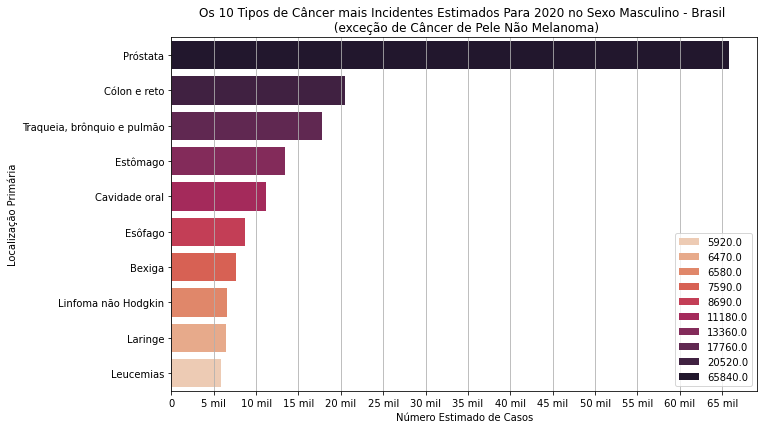

In [11]:
# Plot
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 6.5)
ax = sns.barplot(data = mais_incidente_homens, x = 'casos', y = 'localizacao',
                 hue = 'casos', dodge = False, palette = sns.color_palette("rocket_r", 10))

# Customização X
x_ticks = np.arange(0, 70000, 5000)
plt.xticks(x_ticks)
plt.xlabel("Número Estimado de Casos")
formatter = ticker.FuncFormatter(milhares)
ax.xaxis.set_major_formatter(formatter)

# Customização Y
plt.ylabel("Localização Primária")

plt.legend(title = "")
plt.title("Os 10 Tipos de Câncer mais Incidentes Estimados Para 2020 no Sexo Masculino - Brasil \n (exceção de Câncer de Pele Não Melanoma)")
plt.grid(axis = 'x')
plt.show()

Podemos observar a diferença gritante entre o número absoluto de casos estimados de câncer de próstata quando comparamos com as outras possíveis localidades de câncer presentes no TOP 10.
Além de ser hereditário, o câncer de próstata tem incidência comum em homens com mais de 50 anos. Outro problema conhecido sobre esse tipo de câncer é o [preconceito em relação ao exame do toque](https://www.nescon.medicina.ufmg.br/biblioteca/imagem/3783.pdf).

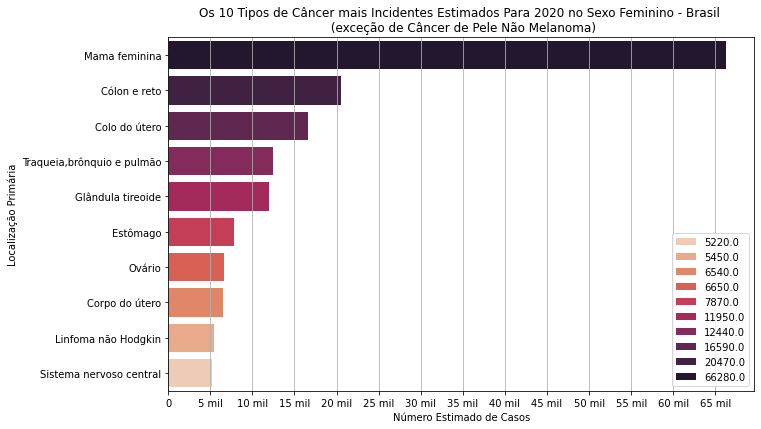

In [12]:
# Plot
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 6.5)
ax = sns.barplot(data = mais_incidente_mulheres, x = 'casos', y = 'localizacao',
                 hue = 'casos', dodge = False, palette = sns.color_palette("rocket_r", 10))

# Customização X
x_ticks = np.arange(0, 70000, 5000)
plt.xticks(x_ticks)
plt.xlabel("Número Estimado de Casos")
formatter = ticker.FuncFormatter(milhares)
ax.xaxis.set_major_formatter(formatter)

# Customização Y
plt.ylabel("Localização Primária")

plt.legend(title = "")
plt.title("Os 10 Tipos de Câncer mais Incidentes Estimados Para 2020 no Sexo Feminino - Brasil \n (exceção de Câncer de Pele Não Melanoma)")
plt.grid(axis = 'x')
plt.show()

Assim como no sexo masculino, é bem gritante a diferença entre o número de casos estimados de câncer de mama quando comparamos com outros tipos de câncer. Com exceção dos tipos de câncer específicos para mulheres (como o do colo e corpo do útero, do ovário), a incidência comum de alguns cânceres se repetem no sexo masculino.

Vamos comparar a incidência estimada desses cânceres entre homens e mulheres:

In [13]:
mais_incidente_homens_hand = mais_incidente_homens.rename(columns = {"casos":"Casos Masculinos"}).drop("part",axis = 1).set_index("localizacao") 
mais_incidente_mulheres_hand = mais_incidente_mulheres.rename(columns = {"casos":"Casos Femininos"}).drop("part", axis = 1).set_index("localizacao") 

mais_inc_juntos = mais_incidente_homens_hand.join(mais_incidente_mulheres_hand)
mais_inc_juntos = mais_inc_juntos.dropna()

mais_inc_juntos

,Casos Masculinos,Casos Femininos
localizacao,,
Cólon e reto,20520.0,20470.0
Estômago,13360.0,7870.0
Linfoma não Hodgkin,6580.0,5450.0


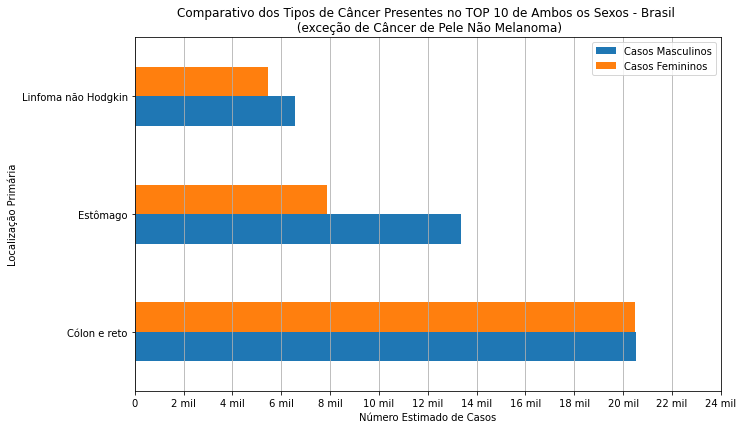

In [14]:
# Plot
ax = mais_inc_juntos.plot(kind= 'barh', figsize = (10.5, 6.5))

# Customização X
x_ticks = np.arange(0, 25000, 2000)
plt.xticks(x_ticks)
plt.xlabel("Número Estimado de Casos")
formatter = ticker.FuncFormatter(milhares)
ax.xaxis.set_major_formatter(formatter)

# Customização Y
plt.ylabel("Localização Primária")

plt.legend(title = "")
plt.title("Comparativo dos Tipos de Câncer Presentes no TOP 10 de Ambos os Sexos - Brasil \n (exceção de Câncer de Pele Não Melanoma)")
plt.grid(axis = 'x')
plt.show()

Nos cânceres com localização primária presente no dataframe que comporta o TOP 10, os homens tem números estimados maiores que as mulheres em todos os casos. Esse é um resultado esperado. Sabe-se que comumente homens possuem um maior número de casos de câncer que as mulheres, devido aos [genes EXITS](https://www.genengnews.com/topics/omics/genetic-exits-explain-cancers-bias-toward-males/).

Uma das diferenças mais expressivas observadas no gráfico acima se refere ao câncer de estômago, com um número de casos estimados masculinos 70% maior do que o número de casos estimados nas mulheres. Uma das hipóteses para essa diferença está nas causas do câncer: O consumo excessivo de álcool.

De acordo com o [Centro de Informações sobre Saúde e Álcool (CISA)](https://cisa.org.br/index.php/pesquisa/dados-oficiais/artigo/item/71-relatorio-global-sobre-alcool-e-saude-2018#:~:text=No%20Brasil%2C%20cerca%20de%2021,de%20%C3%A1lcool%20puro%20per%20capita.), homens brasileiros bebem cerca de 460% mais álcool que mulheres brasileiras. Além disso, segundo uma [pesquisa do Ministério da Saúde (feita em 2018)](https://g1.globo.com/ciencia-e-saude/noticia/2019/07/25/uso-abusivo-de-bebida-alcoolica-teve-aumento-maior-entre-mulheres-do-que-homens-diz-levantamento.ghtml), aproximadamente 26% dos homens fazem uso excessivo de álcool, contra 11% das mulheres. 

## Casos De Câncer Por Unidade Federativa

Agora, vamos investigar as tabelas que separam os números estimados do câncer no Brasil por Unidade Federativa. Novamente, irei utilizar o tabula, uma vez que essas tabelas estão em um PDF.

### Criando os DataFrames

In [15]:
dfs_UFS = tabula.read_pdf(pdf_path, pages = 2)

In [16]:
len(dfs_UFS)

2

In [17]:
dfs_UFS[1].head(10)

,Santa Catarina,1.720,3.370,2.350,1.770,1.290,970,1.050
0,Brasil,65.84,66.28,40.99,30.2,21.23,16.59,15.19


Assim como a primeira tabela da primeira página, o tabula não consegue reconhecer a tabela inteira. Para resolver isso, irei reconstruí-la para um formato .csv.

In [18]:
df1 = pd.read_csv("https://raw.githubusercontent.com/nicolasbuen/Alura-s-Data-Science-Bootcamp/master/modulo_2/desafio/data/df1.txt", sep=";", encoding = 'utf-8', thousands = ".", engine="python", index_col = "Estados")
df2 = pd.read_csv("https://raw.githubusercontent.com/nicolasbuen/Alura-s-Data-Science-Bootcamp/master/modulo_2/desafio/data/df2.txt", sep=";", encoding = 'utf-8', thousands = ".", engine="python", index_col = "Estados")
df3 = pd.read_csv("https://raw.githubusercontent.com/nicolasbuen/Alura-s-Data-Science-Bootcamp/master/modulo_2/desafio/data/df3.txt", sep=";", encoding = 'utf-8', thousands = ".", engine="python", index_col = "Estados")

df3.head()

,Pele Melanoma,Ovário,Linfoma de Hodgkin,Outras Localizações,"Todas as Neoplasias, exceto Pele não Melanoma",Pele não Melanoma,Todas as Neoplasias Malignas
Estados,,,,,,,
Acre,20,**,20,180,960,280,1240
Amapá,20,**,20,150,800,60,860
Amazonas,30,80,40,740,4160,1090,5250
Pará,50,120,30,1570,7590,1660,9250
Rondônia,30,30,20,500,2100,990,3090


In [19]:
cancer_uf = df1.join(df2)
cancer_uf = cancer_uf.join(df3)

cancer_uf.head(10)

,Próstata,Mama Feminina,Cólon e Reto,"Traquéia, Brônquio e Pulmão",Estômago,Colo do Útero,Cavidade Oral,Sistema Nervoso Central,Leucemias,Esôfago,Linfoma não Hodgkin,Glândula Tireoide,Bexiga,Laringe,Corpo do Útero,Pele Melanoma,Ovário,Linfoma de Hodgkin,Outras Localizações,"Todas as Neoplasias, exceto Pele não Melanoma",Pele não Melanoma,Todas as Neoplasias Malignas
Estados,,,,,,,,,,,,,,,,,,,,,,
Acre,120,100,50,100,90,90,20,20,30,20,20,20,20,20,**,20,**,20,180,960,280,1240
Amapá,100,70,20,50,80,90,30,20,30,20,20,20,20,20,**,20,**,20,150,800,60,860
Amazonas,480,450,210,320,380,580,100,150,180,50,90,60,40,90,90,30,80,40,740,4160,1090,5250
Pará,930,780,470,560,860,780,220,220,320,140,140,120,110,100,70,50,120,30,1570,7590,1660,9250
Rondônia,310,220,130,180,120,130,60,70,70,50,40,40,40,40,20,30,30,20,500,2100,990,3090
Roraima,70,60,30,30,30,50,20,20,20,20,20,20,20,20,**,20,**,20,120,610,170,780
Tocantins,760,290,170,220,100,220,60,80,80,40,50,60,20,40,20,20,50,40,520,2840,1360,4200
Alagoas,890,620,230,250,160,300,190,100,120,80,100,120,70,80,90,30,70,30,960,4490,1600,6090
Bahia,6130,3460,1480,1170,1150,1090,750,640,540,690,510,520,470,450,350,220,380,60,4580,24640,7940,32580


In [20]:
cancer_uf.dtypes

Próstata                                          int64
Mama Feminina                                     int64
Cólon e Reto                                      int64
Traquéia, Brônquio e Pulmão                       int64
Estômago                                          int64
Colo do Útero                                     int64
Cavidade Oral                                     int64
Sistema Nervoso Central                           int64
Leucemias                                         int64
Esôfago                                           int64
Linfoma não Hodgkin                               int64
Glândula Tireoide                                 int64
Bexiga                                            int64
Laringe                                           int64
Corpo do Útero                                   object
Pele Melanoma                                     int64
Ovário                                           object
Linfoma de Hodgkin                              

Existem 2 colunas que estão definidas como objeto pelo dtypes. De acordo com a documentação do INCA, em células com valores estimados menores que 20, são colocados dois asteriscos:

In [21]:
cancer_uf[["Ovário", "Corpo do Útero"]].head()

,Ovário,Corpo do Útero
Estados,,
Acre,**,**
Amapá,**,**
Amazonas,80,90
Pará,120,70
Rondônia,30,20


### Exploração dos Dados

Inicialmente, irei utilizar o describe() evitando a última coluna (Brasil / Soma dos Estados) para não mascarar os valores máximos estimados para cada tipo de câncer.

In [22]:
cancer_uf.iloc[:-1].describe()

,Próstata,Mama Feminina,Cólon e Reto,"Traquéia, Brônquio e Pulmão",Estômago,Colo do Útero,Cavidade Oral,Sistema Nervoso Central,Leucemias,Esôfago,Linfoma não Hodgkin,Glândula Tireoide,Bexiga,Laringe,Pele Melanoma,Linfoma de Hodgkin,Outras Localizações,"Todas as Neoplasias, exceto Pele não Melanoma",Pele não Melanoma,Todas as Neoplasias Malignas
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.00000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2438.518519,2454.814815,1518.148148,1118.518519,786.296296,614.444444,562.592593,410.740741,400.370370,421.851852,445.555556,510.37037,394.074074,283.333333,312.962963,97.777778,3350.000000,16608.888889,6552.962963,23161.851852
std,2910.508419,3907.842578,2912.543215,1514.114882,1011.264053,527.653247,865.086001,477.226973,479.121644,582.428847,759.687858,943.11465,788.139285,400.960386,657.137234,158.534959,4817.957595,23912.077144,8659.863569,32464.929485
min,70.000000,60.000000,20.000000,30.000000,30.000000,50.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,120.000000,610.000000,60.000000,780.000000
25%,865.000000,545.000000,270.000000,285.000000,180.000000,240.000000,140.000000,120.000000,130.000000,75.000000,100.000000,95.00000,60.000000,80.000000,35.000000,30.000000,850.000000,4390.000000,1630.000000,6020.000000
50%,1380.000000,840.000000,470.000000,470.000000,430.000000,390.000000,220.000000,220.000000,220.000000,170.000000,140.000000,220.00000,110.000000,120.000000,70.000000,40.000000,1520.000000,7590.000000,3150.000000,10560.000000
75%,2980.000000,2940.000000,1320.000000,1230.000000,1120.000000,930.000000,650.000000,585.000000,510.000000,570.000000,470.000000,415.00000,405.000000,385.000000,240.000000,95.000000,4315.000000,21360.000000,8230.000000,29830.000000
max,13650.000000,18280.000000,14670.000000,6890.000000,4880.000000,2250.000000,4300.000000,2140.000000,2300.000000,2340.000000,3820.000000,4550.00000,4020.000000,1980.000000,3350.000000,830.000000,23210.000000,116650.000000,40220.000000,156870.000000


Com a tabela acima, já podemos tirar algumas informações:

* Os valores máximos estimados para cada tipo de câncer (provavelmente no estado de São Paulo, pela população absoluta);
* A média de casos estimados para cada tipo câncer no Brasil;
* Alto desvio-padrão (esperado pelas diferenças demográficas entre as Unidades Federativas brasileiras);
* O câncer de pele não melanoma é o mais comum no Brasil.

Para continuar com a exploração, irei eliminar as colunas - "Todas as Neoplasias, exceto Pele não Melanoma" e "Todas as Neoplasias Malignas" - e linhas - "Brasil" - contendo somatórios.

In [23]:
cancer_uf = cancer_uf.iloc[:-1]
cancer_uf = cancer_uf.drop("Todas as Neoplasias, exceto Pele não Melanoma", axis = 1)
cancer_uf = cancer_uf.drop("Todas as Neoplasias Malignas", axis = 1)
cancer_uf.head()

,Próstata,Mama Feminina,Cólon e Reto,"Traquéia, Brônquio e Pulmão",Estômago,Colo do Útero,Cavidade Oral,Sistema Nervoso Central,Leucemias,Esôfago,Linfoma não Hodgkin,Glândula Tireoide,Bexiga,Laringe,Corpo do Útero,Pele Melanoma,Ovário,Linfoma de Hodgkin,Outras Localizações,Pele não Melanoma
Estados,,,,,,,,,,,,,,,,,,,,
Acre,120,100,50,100,90,90,20,20,30,20,20,20,20,20,**,20,**,20,180,280
Amapá,100,70,20,50,80,90,30,20,30,20,20,20,20,20,**,20,**,20,150,60
Amazonas,480,450,210,320,380,580,100,150,180,50,90,60,40,90,90,30,80,40,740,1090
Pará,930,780,470,560,860,780,220,220,320,140,140,120,110,100,70,50,120,30,1570,1660
Rondônia,310,220,130,180,120,130,60,70,70,50,40,40,40,40,20,30,30,20,500,990


Além disso, para que a população absoluta de cada estado não faça tanta diferença, será adicionado uma coluna com a população estimada pelo IBGE de cada uma das Unidades Federativas, possibilitando assim o cálculo per capita.

In [24]:
# Fonte:  IBGE, IBGE (27 de agosto de 2020). «Estimativa Populacional 2020». ibge.gov.br. Consultado em 04 de novembro de 2020

ibge_est = pd.read_excel("https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/estimativa_dou_2020.xls",
                         skiprows = 1, index_col = "BRASIL E UNIDADES DA FEDERAÇÃO", skipfooter=7)

ibge_est.pop("Unnamed: 1")
ibge_est = ibge_est.drop("Brasil", axis = 0)
regioes = ["Norte", "Sul", "Nordeste", "Sudeste", "Centro-Oeste"]

for regiao in regioes:
    ibge_est = ibge_est.drop(f"Região {regiao}", axis = 0)

# transformar todos os dados em string para não criar NaNs ao usar o str.replace
ibge_est['POPULAÇÃO ESTIMADA'] = ibge_est['POPULAÇÃO ESTIMADA'].apply(lambda x: str(x))

# utilizar regex para remover números entre parenteses
ibge_est['POPULAÇÃO ESTIMADA'] = ibge_est['POPULAÇÃO ESTIMADA'].str.replace("\(.\)","", regex=True)

# utilizar regex para remover pontos de milhar
ibge_est['POPULAÇÃO ESTIMADA'] = ibge_est['POPULAÇÃO ESTIMADA'].str.replace("\.","", regex=True)

# transformar de volta pra int
ibge_est['POPULAÇÃO ESTIMADA'] = ibge_est['POPULAÇÃO ESTIMADA'].apply(lambda x: int(x))

ibge_est.head()

,POPULAÇÃO ESTIMADA
BRASIL E UNIDADES DA FEDERAÇÃO,
Rondônia,1796460
Acre,894470
Amazonas,4207714
Roraima,631181
Pará,8690745


In [25]:
cancer_uf = cancer_uf.join(ibge_est)

In [26]:
cancer_uf = cancer_uf.rename(columns = {"POPULAÇÃO ESTIMADA": "populacao"})
cancer_uf.head()

,Próstata,Mama Feminina,Cólon e Reto,"Traquéia, Brônquio e Pulmão",Estômago,Colo do Útero,Cavidade Oral,Sistema Nervoso Central,Leucemias,Esôfago,Linfoma não Hodgkin,Glândula Tireoide,Bexiga,Laringe,Corpo do Útero,Pele Melanoma,Ovário,Linfoma de Hodgkin,Outras Localizações,Pele não Melanoma,populacao
Estados,,,,,,,,,,,,,,,,,,,,,
Acre,120,100,50,100,90,90,20,20,30,20,20,20,20,20,**,20,**,20,180,280,894470
Amapá,100,70,20,50,80,90,30,20,30,20,20,20,20,20,**,20,**,20,150,60,861773
Amazonas,480,450,210,320,380,580,100,150,180,50,90,60,40,90,90,30,80,40,740,1090,4207714
Pará,930,780,470,560,860,780,220,220,320,140,140,120,110,100,70,50,120,30,1570,1660,8690745
Rondônia,310,220,130,180,120,130,60,70,70,50,40,40,40,40,20,30,30,20,500,990,1796460


### Visualizações e Hipóteses

Vamos começar plotando os 3 tipos de câncer que afetam o maior número de brasileiros: Próstata, Mama Feminina e Pele Não Melanoma.



In [27]:
def cancer_por_100mil(tipo_de_cancer, num_max, step = 5):
    # Plot
    fig, ax = plt.subplots(figsize = (10,12))

    ax = sns.barplot(data=cancer_uf, x = (cancer_uf[tipo_de_cancer]/cancer_uf.populacao)*100000, y = cancer_uf.index,
                     hue = (cancer_uf[tipo_de_cancer]/cancer_uf.populacao), dodge = False,
                     palette = sns.color_palette("rocket_r", 27))

    # Customizações X
    plt.xlabel("Número de Casos por 100 mil/hab")
    x_ticks = np.arange(0, num_max, step)
    plt.xticks(x_ticks)

    plt.title(f"Número de Casos de Câncer de {tipo_de_cancer} Estimados por 100 Mil Habitantes para 2020 - INCA")
    ax.legend_.remove()
    plt.grid(axis = 'x')


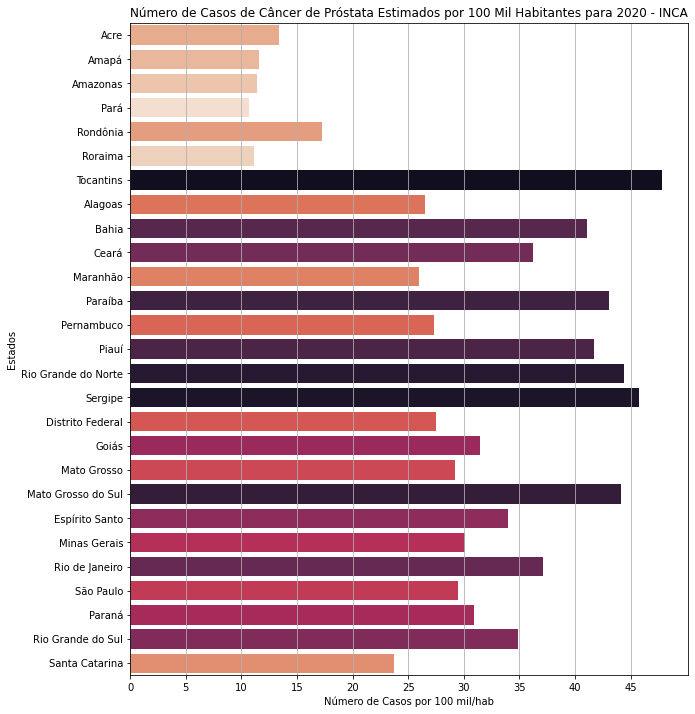

In [28]:
cancer_por_100mil("Próstata", 50)

Entre os 5 estados que mais sofreram de câncer de próstata no ano de 2020, 4 estão na Região Nordeste. Ela possui o maior risco estimado para esse tipo de câncer.

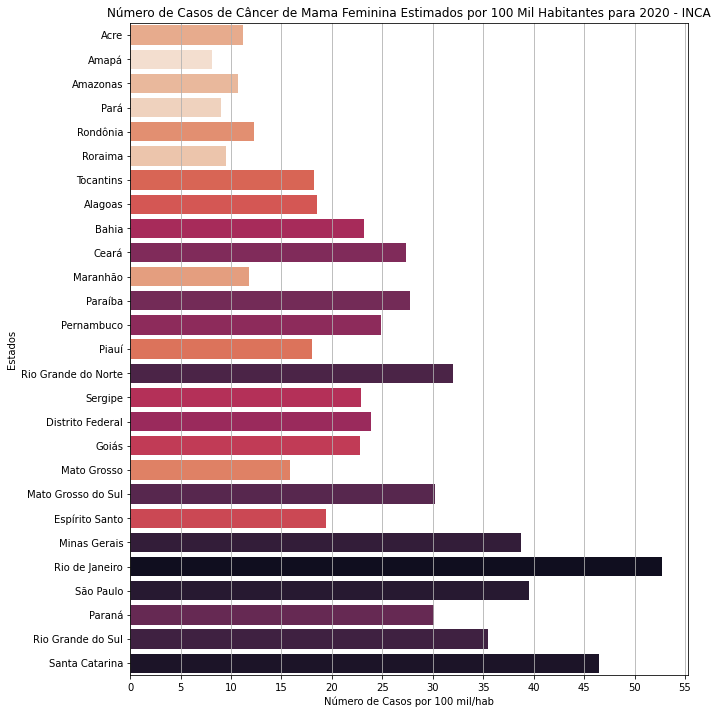

In [29]:
cancer_por_100mil("Mama Feminina", 60)

Já para o câncer de mama, são expresivas as diferenças entre os valores da Região Sul e Sudeste quando comparadas com outras regiões brasileiras, em especial no Estado do Rio de Janeiro, com mais de 50 casos por 100 mil habitantes.

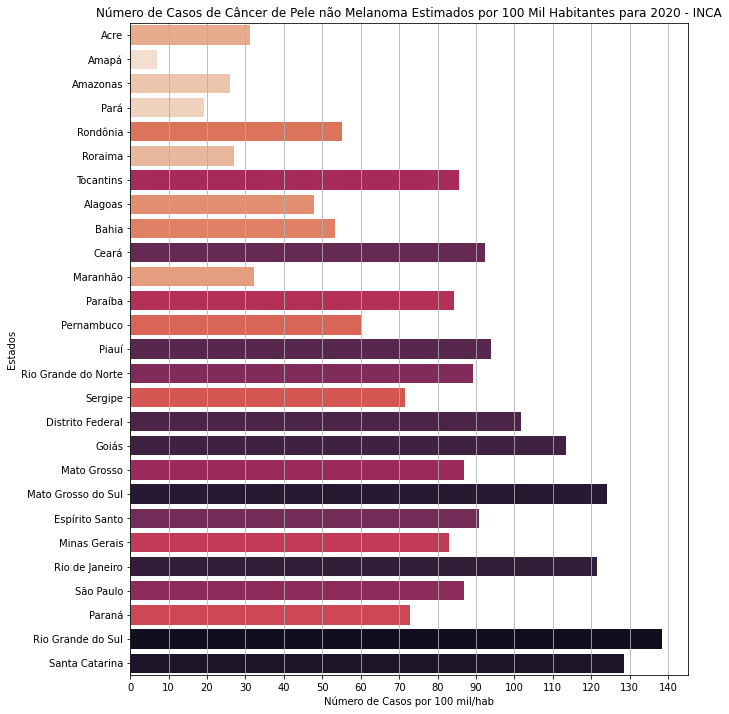

In [30]:
cancer_por_100mil("Pele não Melanoma", 150, step = 10)

São duas as hipóteses para os estados do sul como Santa Catarina e Rio Grande do Sul serem mais atingidos pelo Câncer de Pele (Melanoma ou Não Melanoma):
* Maior incidência dos raios UV na Região
* Maior % de pessoas brancas

Vamos checar a segunda hipótese utilizando o censo demográfico do IBGE:

In [31]:
#Fonte:  IBGE. «Censo Demográfico». ibge.gov.br. Consultado em 04 de novembro de 2020
tabela_cor_raca = pd.read_csv("https://github.com/nicolasbuen/Alura-s-Data-Science-Bootcamp/raw/master/modulo_2/desafio/data/tabela_cor.csv", sep = ";", encoding = "utf-8", engine = "python")
tabela_cor_raca

,Unidade da Federação,Sexo,Idade,Cor ou raça,Total
0,Rondônia,Total,Total,Branca,551843
1,Rondônia,Total,Total,Preta,107082
2,Rondônia,Total,Total,Amarela,22209
3,Rondônia,Total,Total,Parda,869106
4,Rondônia,Total,Total,Indígena,12015
...,...,...,...,...,...
130,Distrito Federal,Total,Total,Branca,1084418
131,Distrito Federal,Total,Total,Preta,198072
132,Distrito Federal,Total,Total,Amarela,41522
133,Distrito Federal,Total,Total,Parda,1239882


#### Bibliografia

CISA. **Relatório Global sobre Álcool e Saúde - 2018.** <https://cisa.org.br/index.php/pesquisa/dados-oficiais/artigo/item/71-relatorio-global-sobre-alcool-e-saude-2018>. Consultado em 04 de novembro de 2020.

Genetic Engineering & Biotechnology News. **Genetic “EXITS” Explain Cancer’s Bias toward Males**. <https://www.genengnews.com/topics/omics/genetic-exits-explain-cancers-bias-toward-males/>. Consultado em 04 de novembro de 2020.

IBGE.**Censo Demográfico**. <https://ibge.gov.br>. Consultado em 04 de novembro de 2020.

IBGE. **Estimativa Populacional 2020**. <https://ibge.gov.br>. Consultado em 04 de novembro de 2020.

INCA. **Estimativa 2020 - Incidência de Câncer no Brasil.** <https://www.inca.gov.br/>. Consultado em 04 de novembro de 2020.

MOREIRA, Natália Milagres. **O Preconceito em Relação Ao Exame de Toque Retal como Forma de Rastreamento do Câncer de Próstata.** <https://www.nescon.medicina.ufmg.br/biblioteca/imagem/3783.pdf>. Consultado em 05 de novembro de 2020.


